In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pima = pd.read_csv("data/pima.csv")



#X = array[:,0:7]
#Y = array[:,7]
X = pima.iloc[:,0:7]#変数
Y =pima["type"].map({'No': 0, 'Yes': 1})#正解データ


#トレーニングデータとテストデータを7:3に分ける
# 以降のrandom_stateは自分の学籍番号を入力する

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.3, random_state=4619055)


#データフレームからある列を削除したい時に用いる．　axis=1で列削除，axis=0で行削除
#X_tr.drop("glu",axis=1)
X

,npreg,glu,bp,skin,bmi,ped,age
0,5,86,68,28,30.2,0.364,24
1,7,195,70,33,25.1,0.163,55
2,5,77,82,41,35.8,0.156,35
3,0,165,76,43,47.9,0.259,26
4,0,107,60,25,26.4,0.133,23
...,...,...,...,...,...,...,...
527,2,88,58,26,28.4,0.766,22
528,9,170,74,31,44.0,0.403,43
529,10,101,76,48,32.9,0.171,63
530,5,121,72,23,26.2,0.245,30


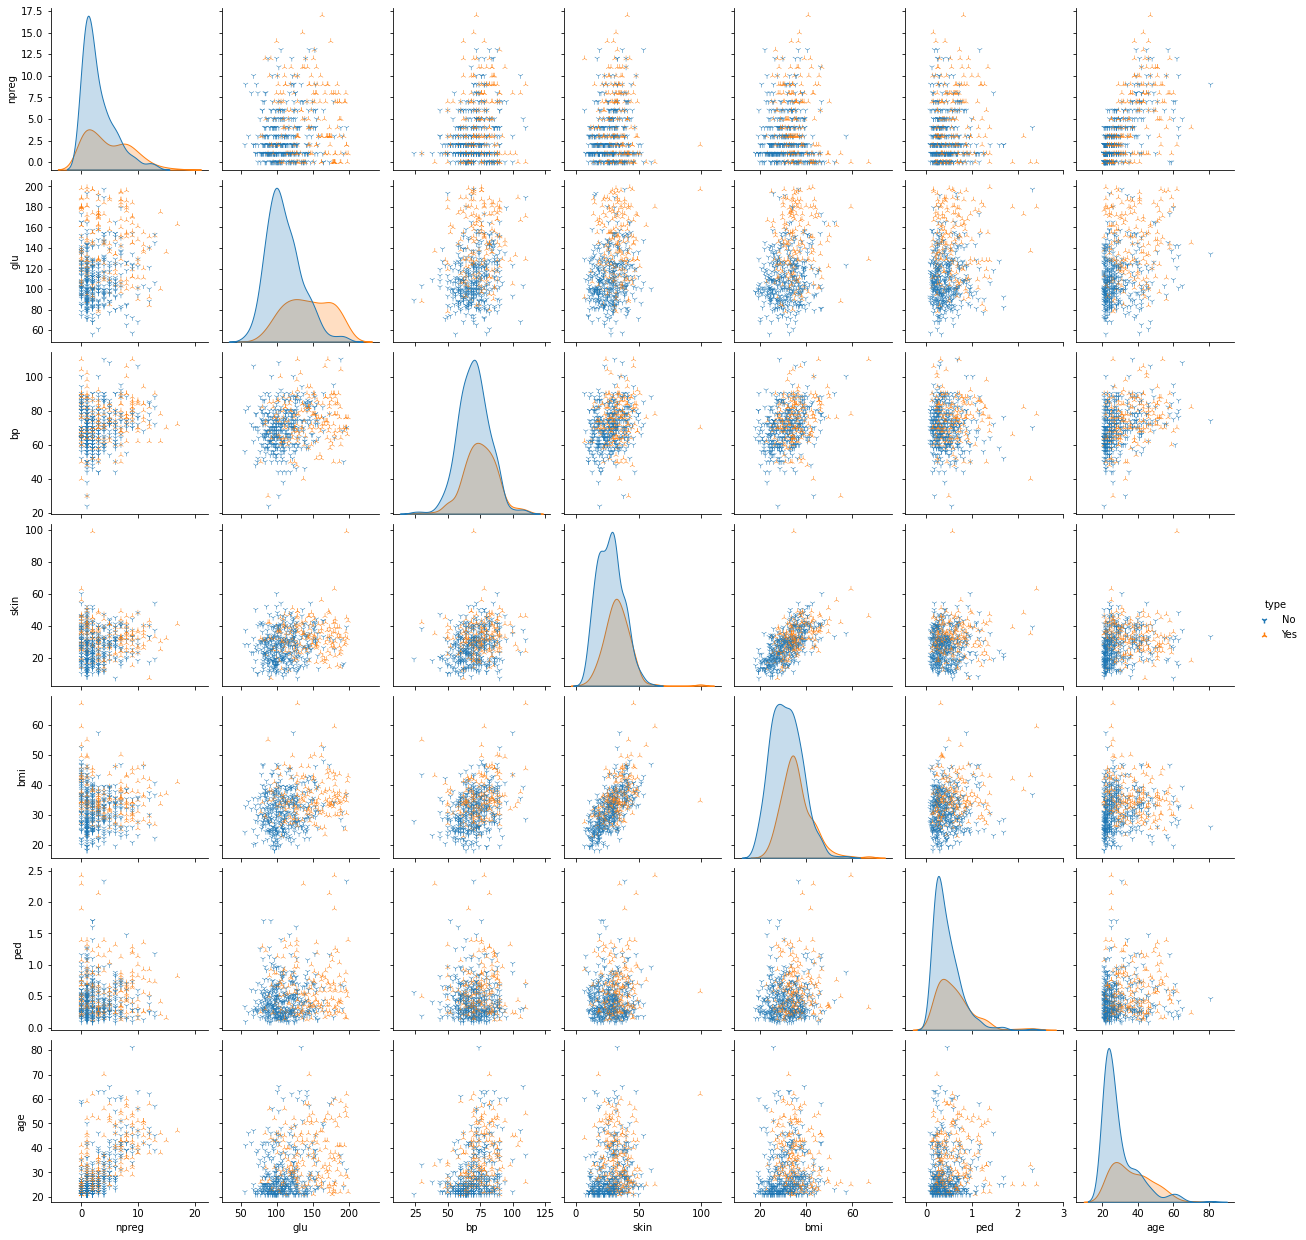

In [43]:
#pairsplot

sns.pairplot(pima,hue = 'type',markers=['1', '2'])

#plt.savefig('plot1.png')

In [44]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデルのインスタンス
lr = LogisticRegression(C=np.inf,solver='newton-cg') 

# トレーニングデータから，ロジスティック回帰モデルの重みを学習
lr.fit(X_tr, Y_tr)

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[ 0.15474395  0.03454224 -0.0032637   0.01129393  0.08756473  1.6164614
   0.02254361]]
intercept =  [-10.27316667]


In [45]:
# テストデータにおける検証を行う．

Y_pred = lr.predict(X_te)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


#混同行列
print('confusion matrix = \n', confusion_matrix(y_true=Y_te, y_pred=Y_pred))
#正確度
print('accuracy = ', accuracy_score(y_true=Y_te, y_pred=Y_pred))
#汎化誤差
print('汎化誤差 = ', 1-accuracy_score(y_true=Y_te, y_pred=Y_pred))
#適合率
print('precision = ', precision_score(y_true=Y_te, y_pred=Y_pred))
#F値
print('f1 score = ', f1_score(y_true=Y_te, y_pred=Y_pred))

confusion matrix = 
 [[93 12]
 [23 32]]
accuracy =  0.78125
汎化誤差 =  0.21875
precision =  0.7272727272727273
f1 score =  0.6464646464646464


Text(0, 0.5, 'true positive rate')

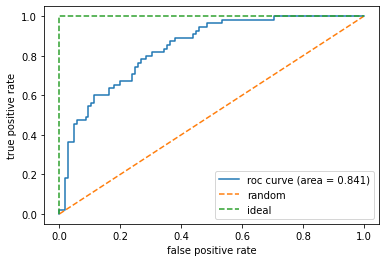

In [46]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_te)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=Y_te, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random') # tpr=fprの時ランダム
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal') #理想的な分割
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
#plt.savefig('-.png')

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# glu と　bmiを用いた2次元データ
X_tr_glu_bmi = X_tr.loc[:,["glu","bmi"]]
X_te_glu_bmi = X_te.loc[:,["glu","bmi"]]

# SVMのモデルをデータに当てはめる
# C コストパラメータ
# kernel カーネル関数の種類

model = SVC(C=1 ,kernel='linear', random_state=4619055)

# トレーニングデータから，SVMモデルの重みを学習させる．
model.fit(X_tr_glu_bmi, Y_tr)

# トレーニングデータにモデルを当てはめる
pred_train = model.predict(X_tr_glu_bmi  )

# テストデータにモデルを当てはめる
pred_test = model.predict(X_te_glu_bmi )

print('confusion matrix = \n', confusion_matrix(y_true=Y_te, y_pred=pred_test))
print('accuracy = ', accuracy_score(y_true=Y_te, y_pred=pred_test))
print('precision = ', precision_score(y_true=Y_te, y_pred=pred_test))
print('f1 score = ', f1_score(y_true=Y_te, y_pred=pred_test))    

confusion matrix = 
 [[95 10]
 [27 28]]
accuracy =  0.76875
precision =  0.7368421052631579
f1 score =  0.6021505376344085


In [16]:
#パラメータのの値を1,10,100,1000の4つで検証する．

C = [1,10,100,1000,10000]

# glu と　bmiを用いた2次元データ
X_tr_glu_bmi = X_tr.loc[:,["glu","bmi"]]
X_te_glu_bmi = X_te.loc[:,["glu","bmi"]]

#各パラメータによって得られた結果(訓練誤差，汎化誤差)を記述するリスト
error_train_list = []
error_test_list = []


for c in C:
    print('C： %d' % c)
    model = SVC(C=c ,kernel='linear', random_state=4619055)
    model.fit(X_tr_glu_bmi  , Y_tr)
# トレーニングデータに対する精度
    pred_train = model.predict(X_tr_glu_bmi  )
    error_train = 1-accuracy_score(Y_tr, pred_train)
#テストデータに対する精度
    pred_test = model.predict(X_te_glu_bmi )
    error_test = 1-accuracy_score(Y_te, pred_test)

    print('訓練誤差： %.3f' % error_train)
    print('汎化誤差： %.3f' % error_test) 

    error_train_list.append(error_train)
    error_test_list.append(error_test)

C： 1
訓練誤差： 0.226
汎化誤差： 0.231
C： 10
訓練誤差： 0.223
汎化誤差： 0.231
C： 100
訓練誤差： 0.218
汎化誤差： 0.244
C： 1000
訓練誤差： 0.220
汎化誤差： 0.250
C： 10000
訓練誤差： 0.226
汎化誤差： 0.250


Text(0, 0.5, 'error_rate')

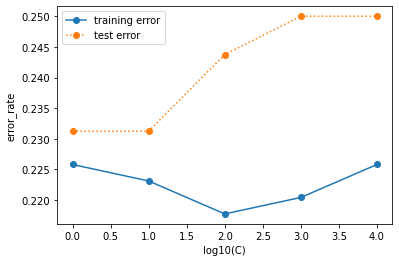

In [17]:
p1=plt.plot(np.log10(C), error_train_list,marker="o")
p2=plt.plot(np.log10(C), error_test_list,marker="o",linestyle="dotted")
plt.legend((p1[0], p2[0]), ("training error", "test error"), loc=2)


plt.xlabel("log10(C)")
plt.ylabel("error_rate")

#plt.savefig('-.png')

<ipython-input-18-f48c089955ea>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_x = np.array([np.array(X_tr_glu_bmi) ,np.array( X_te_glu_bmi)])
<ipython-input-18-f48c089955ea>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_y = np.array([np.array(Y_tr) ,np.array( Y_te)])


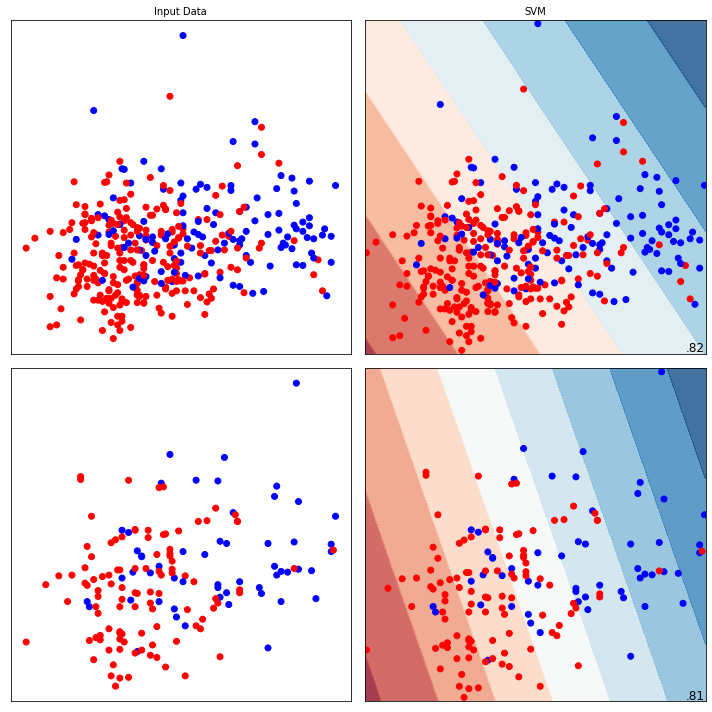

In [18]:
a=np.array(X_tr_glu_bmi) 
b=np.array( X_te_glu_bmi)

data_x = np.array([np.array(X_tr_glu_bmi) ,np.array( X_te_glu_bmi)])
data_y = np.array([np.array(Y_tr) ,np.array( Y_te)])

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import numpy as np

# 決定境界をプロットするメソッド
## 
def plot_decision_boundary(ax, x, y, estimator, cmap=plt.cm.RdBu, h=0.02):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)
    estimator.fit(train_x, train_y)
    score = estimator.score(test_x, test_y)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), np.arange(f2_min, f2_max, h))
    if hasattr(estimator, "decision_function"):
        Z = estimator.decision_function(np.c_[f1.ravel(), f2.ravel()])
    else:
        Z = estimator.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
    Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap, alpha=0.8)
    ax.text(f1.max() - 0.3, f2.min() + 0.3, ('%.2f' % score).lstrip('0'), size=12, horizontalalignment='right')

########################################################################################################

if __name__ == "__main__":
    
    # 使用するモデルを定義する
    ESTIMATORS = {
        'SVM' : SVC(C=100 ,kernel='linear', random_state=None)
    }

    cmap = ListedColormap(['#FF0000', '#0000FF'])

    n_cols = len(data_x)
    n_rows = len(ESTIMATORS) + 1

    # 各モデルの決定境界をそれぞれプロットする
    fig, axes = plt.subplots(n_cols, n_rows, figsize=(10,10))
    for i in range(n_cols):
        x = data_x[i]
        y = data_y[i]
        for j in range(n_rows):
            ax = axes[i,j]
            if j==0:
                name = 'Input Data'
            else:
                name = list(ESTIMATORS.keys())[j-1]
                estimator = list(ESTIMATORS.values())[j-1]
                plot_decision_boundary(ax, x, y, estimator)
            ax.scatter(x[:,0], x[:,1], c=y, cmap=cmap)
            ax.set_xticks(())
            ax.set_yticks(())
            if i==0:
                ax.set_title(name, fontsize=10)
    plt.tight_layout()
    #plt.savefig('-.png')
    plt.show()

# レポート課題1

/Users/tea/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tea/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

confusion matrix = 
 [[94 11]
 [24 31]]
accuracy =  0.78125
汎化誤差 =  0.21875
precision =  0.7380952380952381
f1 score =  0.6391752577319588


/Users/tea/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'true positive rate')

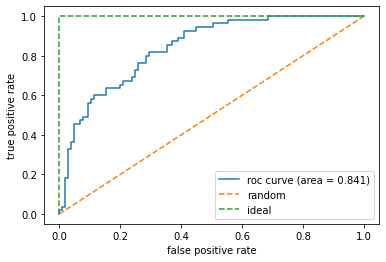

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

pima = pd.read_csv("data/pima.csv")

X = pima.iloc[:,0:7]
Y =pima["type"].map({'No': 0, 'Yes': 1})

select = RFECV(LogisticRegression(), cv=10, scoring='average_precision')
select.fit(X, Y)
mask = select.support_
X_selected = X.iloc[:,mask]

X_tr, X_te, Y_tr, Y_te = train_test_split(X_selected, Y, test_size=0.3, random_state=4619055)

lr = LogisticRegression(C=np.inf,solver='newton-cg') 
lr.fit(X_tr, Y_tr)

Y_pred = lr.predict(X_te)

print('confusion matrix = \n', confusion_matrix(y_true=Y_te, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('汎化誤差 = ', 1-accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_te, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_te, y_pred=Y_pred))

Y_score = lr.predict_proba(X_te)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=Y_te, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

# 課題2

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pima = pd.read_csv("data/pima.csv")
X = pima.iloc[:,0:7]
Y =pima["type"].map({'No': 0, 'Yes': 1})
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.3, random_state=4619055)

model = SVC(C=1 ,kernel='linear', random_state=4619055)
model.fit(X_tr, Y_tr)
Y_pred = model.predict(X_te)    

print('confusion matrix = \n', confusion_matrix(y_true=Y_te, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('汎化誤差 = ', 1-accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_te, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_te, y_pred=Y_pred))

best_score = float(0.0)
best_param_gamma = 0.0
best_param_C = 0.0
 
scores = pd.DataFrame()
for gamma in np.linspace(0.01, 10, 100):
    for C in np.linspace(0.01, 10, 100):
        svm = SVC(kernel = 'rbf', gamma=gamma, C=C, random_state=4619055)
        svm.fit(X_tr, Y_tr)
        scores = scores.append(
                {
                    'gamma': gamma,
                    'C': C,
                    'accuracy': svm.score(X_te, Y_te)
                },
                ignore_index=True)
        
        if best_score < svm.score(X_te, Y_te):
            best_score = svm.score(X_te, Y_te)
            best_param_gamma = gamma
            best_param_C = C
            
print("ベストスコア：", round(best_score,2))
print('g:%s c:%s' %(round(best_param_gamma,2),round(best_param_C,2)))

gamma = best_param_gamma
C = best_param_C
 
svm = SVC(kernel = 'rbf', gamma=gamma, C=C, random_state=4619055)
 
svm.fit(X_tr, Y_tr)
Y_pred = svm.predict(X_te)
print('confusion matrix = \n', confusion_matrix(y_true=Y_te, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('汎化誤差 = ', 1-accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_te, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_te, y_pred=Y_pred))

confusion matrix = 
 [[95 10]
 [25 30]]
accuracy =  0.78125
汎化誤差 =  0.21875
precision =  0.75
f1 score =  0.631578947368421
ベストスコア： 0.74
g:0.01 c:1.02
confusion matrix = 
 [[95 10]
 [31 24]]
accuracy =  0.74375
汎化誤差 =  0.25625
precision =  0.7058823529411765
f1 score =  0.5393258426966292


# 課題3

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['category'] = wine.target
data = data.query("category == 0 | category == 1")
X = data[data.columns[data.columns != 'category']]
Y = data['category']

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.3, random_state=4619055)

lr = LogisticRegression(C=np.inf, solver='newton-cg')

lr.fit(X_tr, Y_tr)
Y_pred = lr.predict(X_te)
print('confusion matrix = \n', confusion_matrix(y_true=Y_te, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('汎化誤差 = ', 1-accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_te, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_te, y_pred=Y_pred))

wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['category'] = wine.target
data = data.query("category == 0 | category == 1")
X = data[data.columns[data.columns != 'category']]
Y = data['category']

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.3, random_state=4619055)

model = SVC(C=1 ,kernel='linear', random_state=4619055)

model.fit(X_tr, Y_tr)
Y_pred = model.predict(X_te)
print('confusion matrix = \n', confusion_matrix(y_true=Y_te, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('汎化誤差 = ', 1-accuracy_score(y_true=Y_te, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_te, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_te, y_pred=Y_pred))

confusion matrix = 
 [[18  1]
 [ 1 19]]
accuracy =  0.9487179487179487
汎化誤差 =  0.05128205128205132
precision =  0.95
f1 score =  0.9500000000000001
confusion matrix = 
 [[19  0]
 [ 0 20]]
accuracy =  1.0
汎化誤差 =  0.0
precision =  1.0
f1 score =  1.0


# 課題4

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix

data= load_wine()
dataX = pd.DataFrame(data=data.data,columns=data.feature_names)
dataY = pd.DataFrame(data=data.target)
dataY = dataY.rename(columns={0: 'class'})
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.3,random_state=4619055)
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
df = pd.DataFrame(clf.predict_proba(X_test))
df = df.rename(columns={0: 'class_0',1: 'class_1',2: 'class_2'})
df = pd.DataFrame(clf.predict(X_test))
df = df.rename(columns={0: '判定'})
df = pd.DataFrame(confusion_matrix(Y_test,clf.predict(X_test).reshape(-1,1)))
df = df.rename(columns={0: 'class_0',1: 'class_1',2: 'class_2'}, index={0: 'class_0',1: 'class_1',2: 'class_2'})
print(df)
clf.score(X_test,Y_test) 

         class_0  class_1  class_2
class_0       19        0        0
class_1        1       20        2
class_2        0        0       12


0.9444444444444444